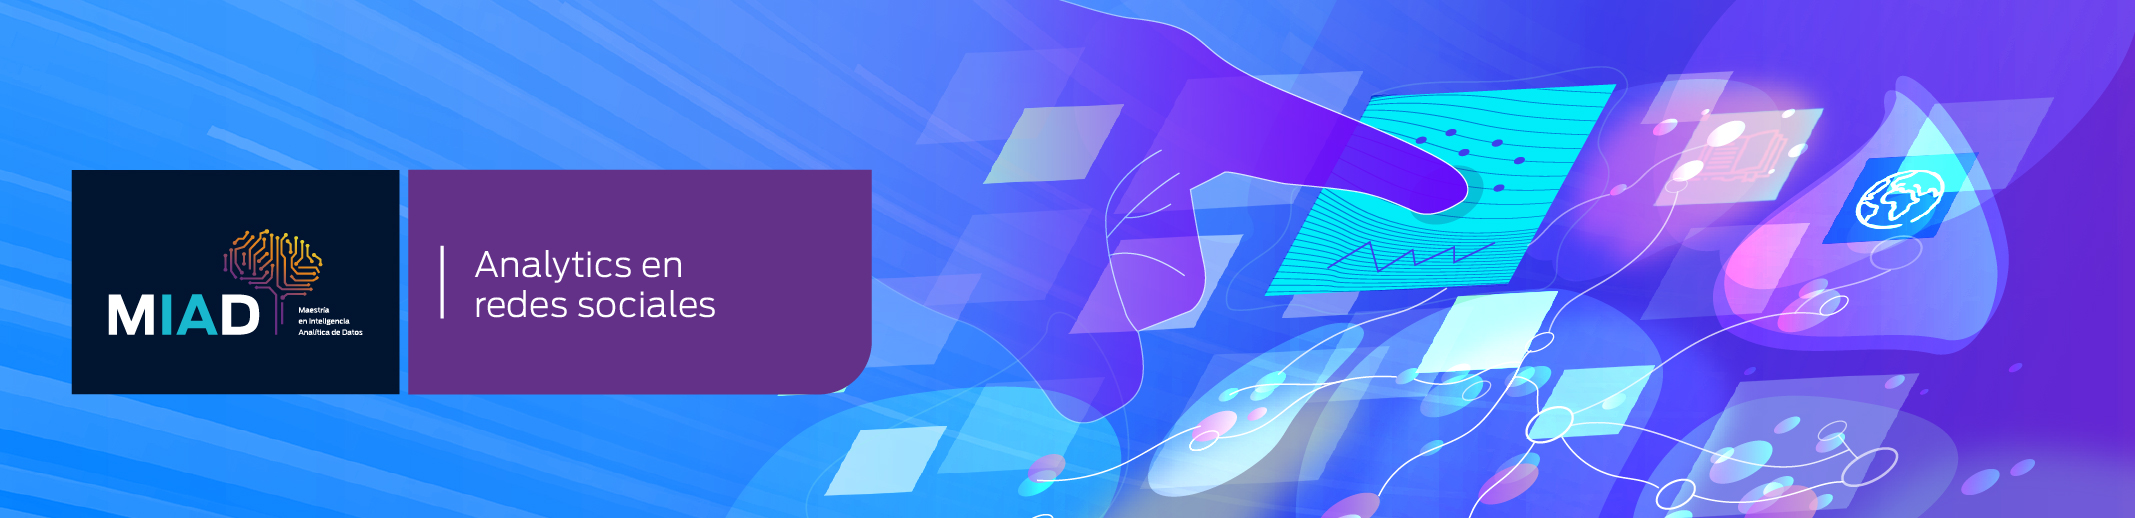

# Tutorial: Introducción al uso de la librería NetworkX en Python

En este notebook se realizará una primera introducción a NetworkX, una librería especializada en el estudio de redes.

Este cuaderno está diseñado como guía para que inicie su proceso de aprendizaje en este curso, por lo tanto, en este se le darán ejemplos ilustrativos de cómo solucionar algunos de los ejercicios que se desarrollarán a lo largo del curso.

#### Expectativas del tutorial

En este tutorial esperamos que usted logre adquirir las siguientes habilidades:
+ Manejar y gestionar redes en Python mediante NetworkX.
+ Crear redes a partir de DataFrames de Python.
+ Visualizar redes.
+ Entender funcionalidades básicas de NetworkX.

### NetworkX


NetworkX es un paquete de Python para la creación, manipulación y estudio de la estructura, dinámica y funciones de redes complejas.

Este paquete permite:
- Estructurar datos para gráficos, dígrafos y multigrafos.
- Utilizar algoritmos gráficos estándar.
- Estructurar redes y generar medidas de análisis.
- Generar gráficos clásicos, gráficos aleatorios y redes sintéticas.
- Definir nodos de diferentes maneras (p.ej, texto, imágenes, registros XML).
- Modelar arcos mediante datos arbitrarios (p.ej., pesos, series de tiempo).

Para mayor informacion sobre el paquete pueden consultar esta [documentación](https://networkx.github.io/documentation/stable/).

#### Tabla de Contenido

+ [Crear una red](#crearred)
+ [Agregar nodos](#Agregarnodos)
+ [Agregar arcos](#Agregararcos)
+ [Agregar atributos](#atributos)
+ [Crear una red desde un Data Frame](#RedDataFrame)
+ [Primeras funciones](#funciones)
+ [Visualización](#visualizacion)
+ [Ejercicio](#ejercicio)

El primer paso es importar la liberia de NetworkX:

In [1]:
import networkx as nx

<a id = "crearred"></a>
### Crear una red

Una red posee dos elementos principales: los nodos y los arcos entre los nodos. Estas relaciones pueden ser dirigidas o no dirigidas.

Una red puede ser dirigida cuando los arcos de la red tienen un sentido definido. Sin embargo una red es no dirigida cuando los arcos son relaciones simétricas y no tienen ningún sentido.

En NetworkX el primer paso para crear una red es definirla, para esto existen dos funciones ``nx.Graph()``y ``nx.DiGraph()``.

+ ``nx.Graph()`` permite crear una red No dirigida, es decir donde los arcos no tienen dirección.
+ ``nx.DiGraph()`` permite crear una red dirigida, donde los arcos poseen una dirección.

Al crear la red es importante no olvidar que esta debe guardarse en una variable como por ejemplo ``G`` o ``A``.

In [2]:
# Crear una red No dirgida
G=nx.Graph()

# Crear una red dirigida
A=nx.DiGraph()

<a id = "Agregarnodos"></a>
### Agregar nodos
Para agregar los nodos a una red ``G`` podemos usar las funciones ``.add_node(id_del_nodo)`` o ``.add_nodes_from([lista_de_id_nodos])``:
+ ``.add_node(id_del_nodo)`` agrega un solo nodo a la red. Esta función recibe lo que será de aquí en adelante el identificador del nodo con el cuál podremos hacer consultas.
+ ``.add_nodes_from([lista_de_id_nodos])`` agrega una lista de nodos a la red. Esta función recibe la lista de nodos con su respectivo identificador.

In [3]:
# Agregar nodos uno por uno
G.add_node(1)
G.add_node(2)
G.add_node("x")

# Agregar una lista de nodos
G.add_nodes_from([3,10])
G.add_nodes_from(["y","z","w"])

Si se quiere ver cuáles son los nodos de la red podemos usar la función ``.nodes()`` o ``.nodes``, las dos son equivalentes.

In [4]:
# Coloque aquí la función para ver los nodos de la red
G.nodes()

NodeView((1, 2, 'x', 3, 10, 'y', 'z', 'w'))

*Resultado esperado:* ``NodeView((1, 2, 'x', 3, 10, 'y', 'z', 'w'))``

Si se desea eliminar nodos de la red se usan las siguientes funciones: ``.remove_node(id_del_nodo)`` o ``.remove_nodes_from([lista_de_id_nodos])``:

+ ``.remove_node(id_del_nodo)`` remueve un nodo a la vez, recibe el identificador del nodo que se desea eliminar.
+ ``.remove_nodes_from([lista_de_id_nodos])`` remueve varios nodos a la vez a partir de una lista de identificadores.

In [5]:
# Eliminar nodos
G.remove_node("x")
G.remove_nodes_from(["z","y"])
G.nodes()

NodeView((1, 2, 3, 10, 'w'))

*Resultado esperado:* ``NodeView((1, 2, 3, 10, 'w'))``

<a id = "Agregararcos"></a>
### Agregar arcos

Para agregar los arcos usamos las funciones ``.add_edge([tupla_nodos])`` o ``.add_edges_from([lista_tuplas_nodos])``. Se usan las mismas funciones independientemente de si la red es dirigida o no. La gran diferencia radica en que si, por ejemplo, agregamos la arista entre los nodos ``1`` y ``2`` mediante la tupla ``(1,2)``, en una red no dirgida los dos nodos establecen una conexion bi-derecional, pero en una red dirigida solo se establece una relación de ``1`` con ``2`` y no de ``2`` con ``1``. Es por esta razón que el orden de las tuplas es importante en las redes dirigidas.

In [6]:
# Agregar cada arista una por una
G.add_edge(1,2)
G.add_edge(2,10)

# Agregar arcos de una lista de tuplas
G.add_edges_from([(2,"w"),(3,"w"),("w",10)])

Si se quiere ver el cuáles son los arcos de la red podemos usar la función ``.edges()`` o ``.edges``, las dos son equivalentes.

In [7]:
# Coloque aquí la función para ver los arcos de la red
G.edges

EdgeView([(1, 2), (2, 10), (2, 'w'), (3, 'w'), (10, 'w')])

*Resultado esperado:* ``EdgeView([(1, 2), (2, 10), (2, 'w'), (3, 'w'), (10, 'w')])``

Para eliminar arcos se usan las funciones ``.remove_edge(tupla_nodos)`` o ``.remove_edges_from([lista_tuplas_nodos])``.
+ ``.remove_edge(tupla_nodos)`` remueve un arco a la vez, recive la tupla de nodos que se desea eliminar.
+ ``.remove_edges_from([lista_tuplas_nodos])`` remueve varios arcos a la vez a partir de una lista de tuplas.

In [8]:
# Eliminar arcos
G.remove_edge(2,10)
G.edges

EdgeView([(1, 2), (2, 'w'), (3, 'w'), (10, 'w')])

*Resultado esperado:* ``EdgeView([(1, 2), (2, 'w'), (3, 'w'), (10, 'w')])``

<a id = "atributos"></a>
### Agregar atributos a la red, sus nodos y a sus arcos

Una red posee gran cantidad de informacion en sus nodos y en sus arcos. Dicha información se puede guardar como atributos relacionados a los elementos de una red. Aquí les mostramos cómo agregar información y cómo consultarla:

Para agregar atributos a la **red** usamos la estructura ``nombre_grafo = nx.Graph(atributo=valor)``. *nota: esto se hace al crear la red*.

Para modificarlos ``nombre_grafo.graph[atributo] = nuevo_valor``.

Existen dos formas de agregar atributos como por ejemplo el *nombre* a un nodo:

1) Al momento de agregar el nodo, modificamos la fórmula para agregar nodos de la siguiente manera: ``nombre_grafo.add_node(id_nodo, atributo = valor)``.

2) Después de haber agregado el nodo, usamos ``nombre_grafo.nodes[id_nodo][atributo] = valor``.

Esta informacion se guarda en forma de un diccionario, asi que se pueden usar todas las propiedades de este formato de datos.

In [9]:
G.nodes[1]["Nombre"] = "Andrea"
G.nodes[3]["Nombre"] = "Gabriel"
G.nodes.data()

NodeDataView({1: {'Nombre': 'Andrea'}, 2: {}, 3: {'Nombre': 'Gabriel'}, 10: {}, 'w': {}})

*Resultado esperado:* ``NodeDataView({1: {'Nombre': 'Andrea'}, 2: {}, 3: {'Nombre': 'Gabriel'}, 10: {}, 'w': {}})``

Para agregar atributos a un arco, como por ejemplo el *color* usamos:

1) ``nombre_grafo.add_edge(id_nodo_1, id_nodo_2, atributo = valor)`` al momento de crear el arco.

2) ``nombre_grafo[id_nodo_1][id_nodo_2][atributo] = valor`` si el arco ya está creado.

Esta informacion se guarda en forma de un diccionario, asi que se pueden usar todas las propiedades de este formato de datos.

*Nota: Existe el atributo especial ``weight``, el cual debe ser numérico, ya que lo utilizan los algoritmos que requieren ponderar los pesos de los arcos. En ``weight`` se encuentra el peso de la conexión, por ejemplo, si los nodos son personas y las conexiones si interactúan, entonces en weight podríamos tener la cantidad de interacciones.*

In [10]:
G[10]["w"]["Color"]="Azul"
G[1][2]["Color"]="Rojo"
G.edges.data()

EdgeDataView([(1, 2, {'Color': 'Rojo'}), (2, 'w', {}), (3, 'w', {}), (10, 'w', {'Color': 'Azul'})])

*Resultado esperado:* ``EdgeDataView([(1, 2, {'Color': 'Rojo'}), (2, 10, {}), (2, 'w', {}), (3, 'w', {}), (10, 'w', {'Color': 'Azul'})])``

<a id = "RedDataFrame"></a>
### Crear una red desde un Data Frame

Importemos la librería para Data Frames:

In [11]:
# Impartar Pandas
import pandas as pd

Para entender como crear una red a partir de un Data Frame ejecute el siguinte código, donde cargará dos Data Frames, uno con los Nodos y otro con los Arcos de una red.

In [12]:
# Data frame de nodos
Nodos=pd.DataFrame([[2365,"Amanda",23],[9654,"Roberto",46],[1054,"Fang",16],[2045,"Samir",35],
                     [8265,"Kelly",65],[1395,"Talib",38],[6501,"Klaus",46],[4306,"Alina",29]],
                    columns=['id','nombre','edad']).set_index('id')
display(Nodos)

# Data frame de arcos
Arcos=pd.DataFrame([[2365,2045,10],[9654,4306,30],[8265,9654,5],[1395,1054,13],[2365,4306,22],[2045,8265,7],[6501,2365,10],
                    [4306,8265,18],[1054,1395,25],[1054,8265,6]],columns=['origen','destino','weight'])
display(Arcos)

,nombre,edad
id,,
2365,Amanda,23
9654,Roberto,46
1054,Fang,16
2045,Samir,35
8265,Kelly,65
1395,Talib,38
6501,Klaus,46
4306,Alina,29


,origen,destino,weight
0,2365,2045,10
1,9654,4306,30
2,8265,9654,5
3,1395,1054,13
4,2365,4306,22
5,2045,8265,7
6,6501,2365,10
7,4306,8265,18
8,1054,1395,25
9,1054,8265,6


Definamos una nueva red ``Q`` dirigida:

In [13]:
# Red Q, dirigida
Q=nx.DiGraph()

Ahora si, agreguemos los nodos a partir del Data Frame ``Nodos`` definido anteriormente. Para esto existen muchas formas de hacerlo, pero una de las más convenientes es usar la función ``.add_nodes_from()``, donde podemos enviar dentro de la función la columna o el *index* (identificador) dentro del Data Frame.

In [14]:
# Agregar los nodos por su identificador
Q.add_nodes_from(Nodos.index)

Ahora, para agregar los atributos de cada nodo podemos recorrer los nodos que acabamos de añadir e ir agregado cada atributo del Data Frame:

In [15]:
# Agregar los atributos de los nodos
# Primero recorrer los nodos que se agregaron a la red
for nodo in Q.nodes:
    # En cada nodo recorremos los atributos de los nodos
    for atr in Nodos:
        # Agregar cada atributo al nodo
        Q.nodes[nodo][atr]=Nodos[atr][nodo]

In [16]:
# Verificar que se cargó correctamente
Q.nodes.data()

NodeDataView({2365: {'nombre': 'Amanda', 'edad': 23}, 9654: {'nombre': 'Roberto', 'edad': 46}, 1054: {'nombre': 'Fang', 'edad': 16}, 2045: {'nombre': 'Samir', 'edad': 35}, 8265: {'nombre': 'Kelly', 'edad': 65}, 1395: {'nombre': 'Talib', 'edad': 38}, 6501: {'nombre': 'Klaus', 'edad': 46}, 4306: {'nombre': 'Alina', 'edad': 29}})

*Resultado esperado:* ``NodeDataView({2365: {'Nombre': 'Amanda', 'edad': 23}, 9654: {'Nombre': 'Roberto', 'edad': 46}, 1054: {'Nombre': 'Fang', 'edad': 16}, 2045: {'Nombre': 'Samir', 'edad': 35}, 8265: {'Nombre': 'Kelly', 'edad': 65}, 1395: {'Nombre': 'Talib', 'edad': 38}, 6501: {'Nombre': 'Klaus', 'edad': 46}, 4306: {'Nombre': 'Alina', 'edad': 29}})``

Una vez los nodos y sus atributos estén agregados a la red podemos seguir agregando los arcos. Para esto, una forma muy sencilla de hacerlo es creando tuplas desde el Data Frame *Arcos*. Un truco para esto es selecionando las columnas de *origen* y *destino* y convirtiendolas en un *array* de **numpy** para generar tuplas. Una vez creadas las tuplas podemos usar la fórmula ``add_edges_from()``.

In [17]:
# Agregar los arcos
Q.add_edges_from([tuple(x) for x in Arcos[['origen','destino']].to_numpy()])

Si los arcos tienen atributos podemos agregarlos recorriendo el Data Frame:

In [18]:
# Recorrer los arcos en el Data Frame de arcos
for arco in Arcos.index:
    # Agregar el atributo a cada arco
    Q[Arcos.origen[arco]][Arcos.destino[arco]]['wieght']=Arcos.weight[arco]

*Plus:* si tenemos una red no dirigida podemos utilizar la función ``.from_pandas_dataframe()``, especificando el Data Frame de los arcos y cuales son las columnas *source* y *target*, de la siguiente manera ``.from_pandas_dataframe(DataFrame, source, target)``, y si se desea podemos agregar los atributos de cada arco de la siguinte manera ``.from_pandas_dataframe(DataFrame, source, target, attr)``.

***Nota:*** Si se agrega un arco donde uno o ambos nodos del arco no se encuentran en la red estos se agregarán silenciosamente a la red.

<a id = "funciones"></a>
### Primeras funciones

- Cambiar el tipo de red de indirecta (no dirigida) a directa (dirigida) o viceversa: ``nx.nx.to_undirected(red)`` o ``nx.nx.to_directed(red)``

In [19]:
# Cambiar la red de Directa a Indirecta
R=nx.to_undirected(Q)

In [20]:
# Cambiar la red de Indirecta a Directa
R=nx.to_directed(R)

- Consultar el número de nodos dentro de la red:``.number_of_nodes()``

In [21]:
# Conocer el número de nodos de la red
Q.number_of_nodes()

8

*Resultado esperado:* ``8``

- Consultar el número de arcos dentro de la red:``.number_of_edges()``

In [22]:
# Conocer el número de arcos de la red
Q.number_of_edges()

10

*Resultado esperado:* ``10``

- Lista de vecinos de un nodo ``.neighbors(id_nodo)`` *Nota: Retorna un iterador*.

In [23]:
# Poder iterar sobre los vecinos del nodo 2365
for i in Q.neighbors(2365):
    print(i)

2045
4306


*Resultado esperado:* ``2045`` y ``4306``

<a id = "visualizacion"></a>
### Visualización

A continuacion le mostramos una introducción a lo que es la **visualización de una red** en Python.

Para esto vamos a usar la librería ``matplotlib.pyplot``.

Para saber más de esta librería les recomendamos la [documentación](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html).

In [24]:
# Importar la librería
import matplotlib.pyplot as plt

Para crear una visualización se deben realizar dos pasos: 1) dimensionar el tamaño de la figura, esto es particularmente útil para redes grandes y usamos ``fig=plt.figure(figsize=(ancho,alto))``, y 2) crear la visualización. 
NetworkX posee una gran variedad de algoritmos para gráficar (los puede consultar en el siguinte [link](https://networkx.org/documentation/stable/reference/drawing.html)), el más sencillo es ``nx.draw()``: <br>
- ``nx.draw()`` recibe varios atributos que se pueden consultar [acá](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw.html#networkx.drawing.nx_pylab.draw), pero los que se usan a continuación son ``node_size=tamaño`` (tamaño de los nodos), ``node_color='color'`` (color de los nodos), ``edge_color='color'``(color del arco), ``with_labels=binario`` (binario que define si se muestran o no las etiquetas).

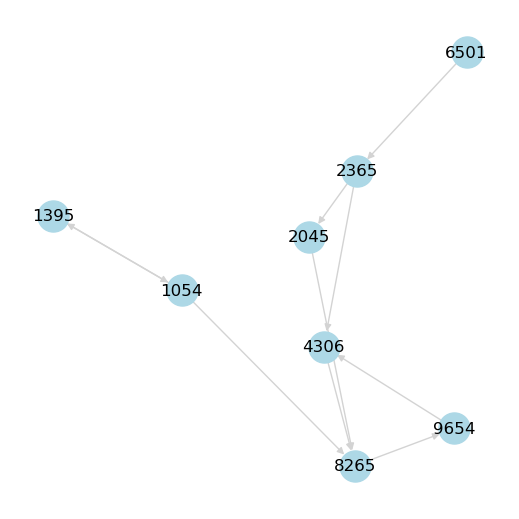

In [25]:
# Crear el lienzo para la red
fig=plt.figure(figsize=(5,5))

# Generar el gráfico
nx.draw(Q, node_size=500, node_color='lightblue', edge_color='lightgray', with_labels=True)

## Nota: la libreria matplotlib.pyplot permite agregar elementos y modificar las graficas de muchos modos
## para ello pueden agregar más lineas de código

Por defecto ``nx.draw()`` escoje como etiqueta el identificador del nodo, pero si se desea usar otra etiqueta a partir de los atributos de los nodos, podemos agregar a la función ``labels={x:Red.nodes[x]['etiqueta'] for x in Q.nodes}``, lo cual crea un diccionario a partir de uno de los atributos de los nodos y lo seleccionan como etiqueta.

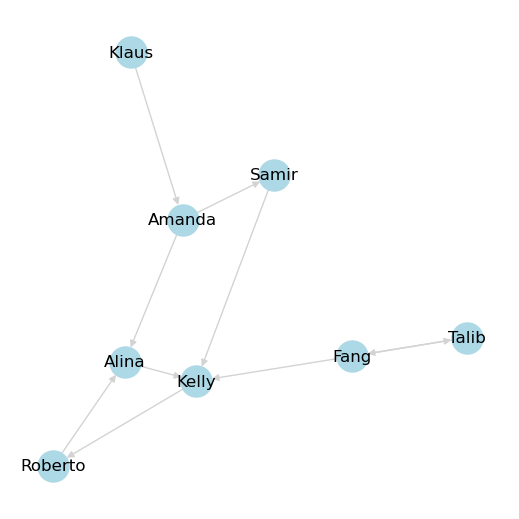

In [26]:
# Figura para la red
fig=plt.figure(figsize=(5,5))

# Generar el gráfico con los nombres como etiquetas 
nx.draw(Q, node_size=500, labels={x:Q.nodes[x]['nombre'] for x in Q.nodes}, node_color='lightblue', edge_color='lightgray',
        with_labels=True)

<a id = "ejercicio"></a>
### Ejercicio

**En este ejercicio podrá construir una red desde cero y familializarce con los conceptos vistos previamente.**

Realice una de las siguintes redes en NetworkX: *Rueda* o *Círculo* .
<div>
<img src="attachment:S1T1%20Imagen.png" width="200"/>
</div>
Para esto siga los siguintes pasos:

1) Construya una red vacía, para el ejercicio puede ser no dirigida.

2) Cree cinco nodos. Estos pueden tener el identificador que desee.

3) Agregue los arcos entre los nodos con el fin de lograr la figura deseada.

4) Visualice la red resultante.

*Nota:* Para el paso 4) es recomendable explorar las opciones de visualización de [Matplotlib](https://networkx.github.io/documentation/stable/reference/drawing.html#module-networkx.drawing.layout).

In [33]:
# Paso 1
# Crear una red No dirgida
W=nx.Graph()



In [35]:
# Paso 2
W.add_nodes_from([1,2,3,4,5])


In [36]:
# Paso 3

# Agregar cada arista una por una
W.add_edge(1,2)
W.add_edge(2,5)

# Agregar arcos de una lista de tuplas
W.add_edges_from([(1,3),(3,4),(4,5)])

W.add_edges_from([(3,5),(3,2),(3,4)])

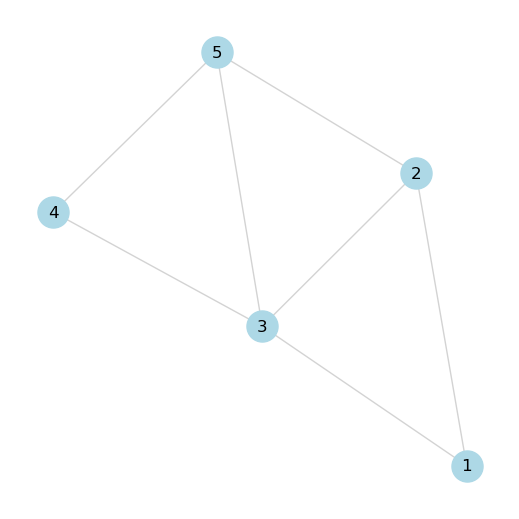

In [37]:
# Paso 4
# Crear el lienzo para la red
fig=plt.figure(figsize=(5,5))

# Generar el gráfico
nx.draw(W, node_size=500, node_color='lightblue', edge_color='lightgray', with_labels=True)

## Nota: la libreria matplotlib.pyplot permite agregar elementos y modificar las graficas de muchos modos
## para ello pueden agregar más lineas de código
